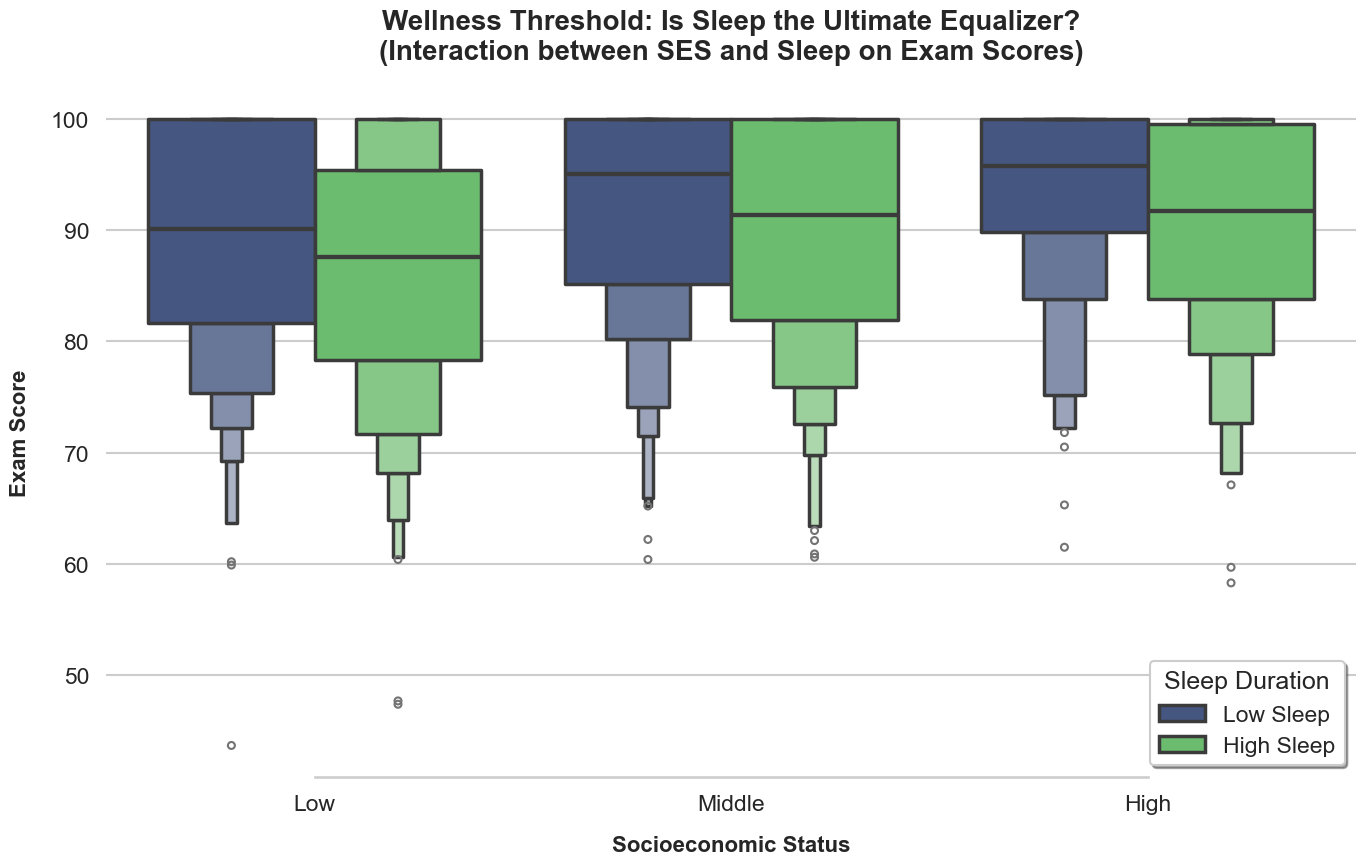

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. LOAD DATA
# Reading the cleaned CSV file from the specified path
df = pd.read_csv(r"C:\Users\nurul\Downloads\cleaned_data.csv")

# 2. DATA PREPARATION
# Create groups based on sleep hours: 7+ hours is 'High Sleep', less is 'Low Sleep'
df['Sleep_Group'] = df['Sleep_Hours_per_Night'].apply(lambda x: 'High Sleep' if x >= 7 else 'Low Sleep')

# Order the socioeconomic status to ensure the plot shows Low -> Middle -> High
status_order = ['Low', 'Middle', 'High']
df['Socioeconomic_Status'] = pd.Categorical(
    df['Socioeconomic_Status'],
    categories=status_order,
    ordered=True
)

# 3. PLOTTING THE GRAPH
plt.figure(figsize=(14, 9))
sns.set_theme(style="whitegrid", context="talk")

# Define colors: Navy for Low Sleep, Green for High Sleep
my_colors = {"Low Sleep": "#3b528b", "High Sleep": "#5ec962"}

# Create the Boxen Plot
ax = sns.boxenplot(
    data=df,
    x="Socioeconomic_Status",
    y="Exam_Score",
    hue="Sleep_Group",
    order=status_order,
    palette=my_colors,
    k_depth="trustworthy",
    linewidth=2.5,
    showfliers=True         # Show outlier points
)

# 4. LABELS AND TITLE
plt.title(
    "Wellness Threshold: Is Sleep the Ultimate Equalizer?\n(Interaction between SES and Sleep on Exam Scores)",
    fontsize=20, fontweight='bold', pad=20
)
plt.xlabel("Socioeconomic Status", fontsize=16, fontweight='bold', labelpad=15)
plt.ylabel("Exam Score", fontsize=16, fontweight='bold', labelpad=15)

# Customize the legend (bottom right)
plt.legend(
    title="Sleep Duration",
    loc='lower right',
    frameon=True,
    shadow=True
)

# Final adjustments and save
sns.despine(trim=True, left=True)
plt.tight_layout()

# Save the plot as an image
plt.savefig("wellness_threshold_boxen_plot.png", dpi=300, bbox_inches='tight')
plt.show()
